Min value: -0.14890298
Max value: 309.4076
Mean value: 0.0131914755
Median value: 0.0


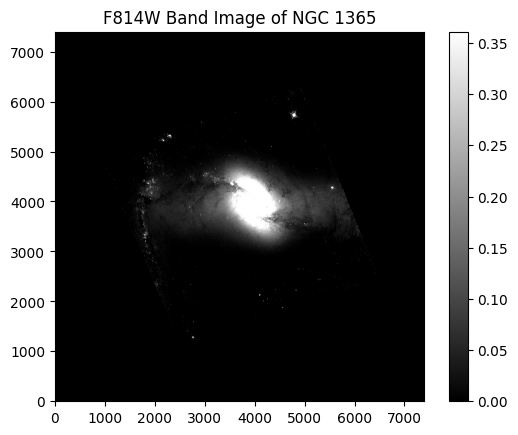

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
fits_image_filename =r"C:\Users\aarus\Downloads\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_multi_v1_drc-bundle\ngc1365\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_f814w_v1_exp-drc-sci.fits"

hdul = fits.open(fits_image_filename)

# For getting file structure
# hdul.info()
image_data = hdul[0].data
print("Min value:", np.min(image_data))
print("Max value:", np.max(image_data))
print("Mean value:", np.mean(image_data))
print("Median value:", np.median(image_data))

plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar()
plt.title("F814W Band Image of NGC 1365")
plt.show()

hdul.close()

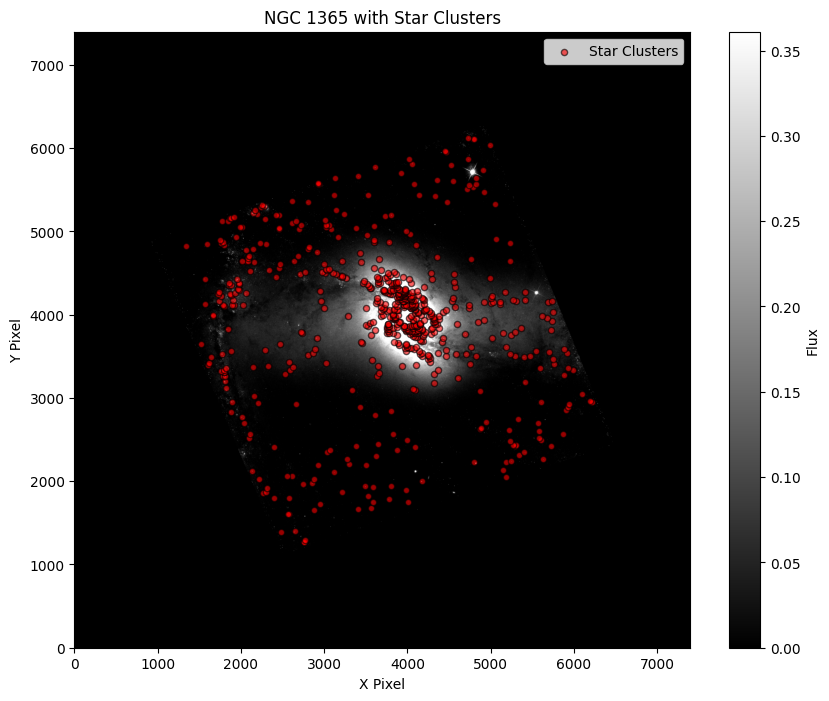

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

# Load galaxy FITS file
galaxy_fits =r"C:\Users\aarus\Downloads\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_multi_v1_drc-bundle\ngc1365\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_f814w_v1_exp-drc-sci.fits"
hdul = fits.open(galaxy_fits)
galaxy_data = hdul[0].data
galaxy_wcs = WCS(hdul[0].header)
hdul.close()

# Load star cluster FITS table
cluster_fits = r"C:\Users\aarus\Downloads\hlsp_phangs-cat_hst_acs-uvis_ngc1365_multi_v1_cats\catalogs\hlsp_phangs-cat_hst_uvis_ngc1365_multi_v1_obs-human-cluster-class12.fits"
hdul = fits.open(cluster_fits)
cluster_data = hdul[1].data
hdul.close()

# Extract RA/DEC from cluster table
ra = cluster_data['PHANGS_RA']
dec = cluster_data['PHANGS_DEC']

# Convert RA/DEC to pixel positions
x_pixel, y_pixel = galaxy_wcs.wcs_world2pix(ra, dec, 0)

plt.figure(figsize=(10, 8))
plt.imshow(galaxy_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(galaxy_data,99))
plt.colorbar(label='Flux')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('NGC 1365 with Star Clusters')

# Overlay star clusters
plt.scatter(x_pixel, y_pixel, c='red', edgecolors='black', s=20, alpha=0.6, label='Star Clusters')
plt.legend()
plt.show()


In [4]:
import numpy as np

# Input data
D_galaxy = 19.57  # distance to galaxy in Mpc
R_phys =  31896.5 # physical radius in parsecs (38000 is the radius of the galaxy)
# Source : https://www.eso.org/sci/publications/messenger/archive/no.31-mar83/messenger-no31-5-7.pdf
theta_pixel = 0.03962 # image scale in arcseconds per pixel (from FITS header, CDELT1 or CDELT2)
# By determinant of CD matrix given in the fits file

# Step 1: Convert physical radius to angular size (arcseconds)
angular_scale = 206265*(R_phys) / (D_galaxy * 1e6)  # Distance in parsecs (1 Mpc = 1e6 pc)

# Step 2: Convert angular size to pixel scale
pixel_radius = angular_scale / theta_pixel

print(f"Aperture radius in pixels: {pixel_radius:.2f}")


Aperture radius in pixels: 8485.22


In [5]:
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Example image (load your image here)
#image_data = fits.getdata("example.fits")  # Replace with your FITS file

# x and y pixel coordinates of points
# x_pixel = np.array([100, 200, 300])  # Example x-coordinates
# y_pixel = np.array([150, 250, 350])  # Example y-coordinates

# Define aperture radius in pixels
aperture_radius = 4

# Create circular apertures
positions = np.transpose((x_pixel, y_pixel))  # Combine x and y positions
apertures = CircularAperture(positions, r=aperture_radius)

# Perform aperture photometry
phot_table = aperture_photometry(image_data, apertures)

# Print results
print(phot_table)

 id      xcenter            ycenter          aperture_sum   
           pix                pix                           
--- ------------------ ------------------ ------------------
  1 2763.5499999999315 1269.0399999994856  54.15896612288043
  2 2758.2999999999465   1271.15999999947 53.169312089444524
  3  2755.959999999168  1275.429999997264   52.9721034800611
  4  2766.110000000439 1289.3600000002348  6.474920308050069
  5 2485.8399999999237  1392.169999999935 0.5731132178591339
  6  2648.970000000528 1406.6300000004408  5.943232977187514
  7 2581.5899999989897 1600.2899999990213  0.911301305390836
  8  2560.229999999939 1606.9299999997934  4.355725132231684
  9  2880.109999999692 1653.4199999994626   2.26656276407615
...                ...                ...                ...
620  4523.219999999506  5795.739999999216  4.502414046363487
621 4057.3500000001964  5815.470000000065 16.643223843727917
622 4013.0899999998855   5864.52999999959 0.6747874195510991
623  4733.160000000362  

C:\Users\aarus\AppData\Local\Temp\ipykernel_2124\2711526031.py:12: RuntimeWarning: invalid value encountered in log10
  apertures_array = np.array([25-2.5*np.log10(e[3]) for e in phot_table])


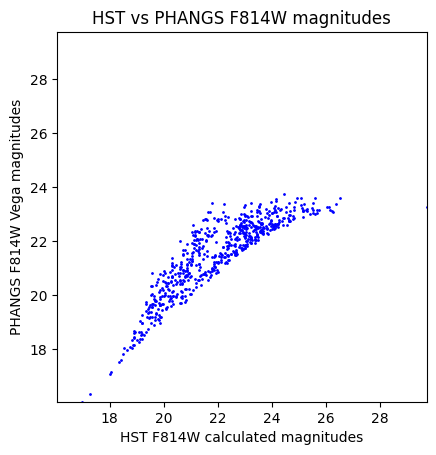

In [6]:
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

fits_image_filename = r"C:\Users\aarus\Downloads\hlsp_phangs-cat_hst_acs-uvis_ngc1365_multi_v1_cats\catalogs\hlsp_phangs-cat_hst_uvis_ngc1365_multi_v1_obs-human-cluster-class12.fits"
hdul = fits.open(fits_image_filename)
hdrtab = hdul[1].data
vega = hdrtab['PHANGS_F814W_VEGA']

# Collect data using a list comprehension
apertures_array = np.array([25-2.5*np.log10(e[3]) for e in phot_table])

# Example: Clean and prepare data
valid_indices = (~np.isnan(apertures_array)) & (~np.isinf(apertures_array)) & (~np.isnan(vega)) & (~np.isinf(vega))
apertures_array = apertures_array[valid_indices]
vega = vega[valid_indices]

# Plotting array1 vs array2
plt.scatter(apertures_array, vega,s=1, marker='o', color='b')
# range = np.linspace(18, 28, 500)  # Generate a range of x values
# plt.plot(range, range, color='red', linestyle='-', label='y=x')

# # Fitting a linear model (degree 1 polynomial)
# coefficients = np.polyfit(apertures_array, vega, 1)  # Linear fit
# best_fit_line = np.poly1d(coefficients)

# # Generate x values and compute y values for the best-fit line
# x_fit = np.linspace(min(apertures_array), max(apertures_array), 500)
# y_fit = best_fit_line(x_fit)

# # Add the best-fit line to the plot
# plt.plot(x_fit, y_fit, color='green', label='Best-Fit Line')

# Adding labels and title
plt.xlabel('HST F814W calculated magnitudes')
plt.ylabel('PHANGS F814W Vega magnitudes')
plt.title('HST vs PHANGS F814W magnitudes')

# Ensure 1:1 aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Adjust the axis limits to fit the data and maintain aspect ratio
all_data = np.concatenate([apertures_array, vega])
plt.xlim(min(all_data), max(all_data))
plt.ylim(min(all_data), max(all_data))
# Display the plot
plt.show()


In [7]:
# Example coordinates (x, y) for the source
# positions = [(50, 50), (100, 100)]  # List of (x, y) positions

# Define the aperture and annulus
aperture_radius = 4  # Aperture radius in pixels
annulus_r_in = 7     # Inner radius of annulus
annulus_r_out = 8    # Outer radius of annulus

apertures = CircularAperture(positions, r=aperture_radius)
annuli = CircularAnnulus(positions, r_in=annulus_r_in, r_out=annulus_r_out)

# Perform aperture photometry
phot_table = aperture_photometry(image_data, apertures)
annulus_masks = annuli.to_mask(method='center')

# Calculate the background level
bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(image_data)  # Apply the annulus mask to the data
    annulus_data_1d = annulus_data[mask.data > 0]  # Use only non-zero values
    bkg_median.append(np.median(annulus_data_1d))  # Calculate the median

bkg_median = np.array(bkg_median)

# Subtract background flux
# (1) Calculate total background flux in the aperture
aperture_area = apertures.area
background_flux = bkg_median * aperture_area

# (2) Subtract background flux from aperture flux
phot_table['residual_flux'] = phot_table['aperture_sum'] - background_flux

# Print the resulting table
print(phot_table)

 id      xcenter            ycenter          aperture_sum      residual_flux   
           pix                pix                                              
--- ------------------ ------------------ ------------------ ------------------
  1 2763.5499999999315 1269.0399999994856  54.15896612288043  38.71695677403113
  2 2758.2999999999465   1271.15999999947 53.169312089444524 29.914215776082166
  3  2755.959999999168  1275.429999997264   52.9721034800611  37.02381605600068
  4  2766.110000000439 1289.3600000002348  6.474920308050069 3.4746471325723536
  5 2485.8399999999237  1392.169999999935 0.5731132178591339 1.4124758778716175
  6  2648.970000000528 1406.6300000004408  5.943232977187514  5.996608678534006
  7 2581.5899999989897 1600.2899999990213  0.911301305390836 1.3448138353392154
  8  2560.229999999939 1606.9299999997934  4.355725132231684 3.7285584353299415
  9  2880.109999999692 1653.4199999994626   2.26656276407615  3.313275828013813
...                ...                ..

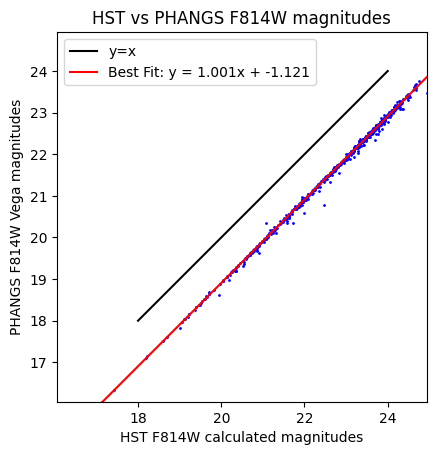

In [8]:
import matplotlib.pyplot as plt
fits_image_filename = r"C:\Users\aarus\Downloads\hlsp_phangs-cat_hst_acs-uvis_ngc1365_multi_v1_cats\catalogs\hlsp_phangs-cat_hst_uvis_ngc1365_multi_v1_obs-human-cluster-class12.fits"
hdul = fits.open(fits_image_filename)
hdrtab = hdul[1].data
vega = hdrtab['PHANGS_F814W_VEGA']

# Collect data using a list comprehension
apertures_array = np.array([25-2.5*np.log10(e[4]) for e in phot_table])

# Example: Clean and prepare data
valid_indices = (~np.isnan(apertures_array)) & (~np.isinf(apertures_array)) & (~np.isnan(vega)) & (~np.isinf(vega))
apertures_array = apertures_array[valid_indices]
vega = vega[valid_indices]

# Plotting array1 vs array2
plt.scatter(apertures_array, vega,s=1, marker='o', color='b')
range = np.linspace(18, 24, 500)  # Generate a range of x values
plt.plot(range, range, color='black', linestyle='-', label='y=x')

# Calculate the best-fit line using numpy polyfit
coeffs = np.polyfit(apertures_array, vega, 1)  # Fit a line y = mx + c
slope, intercept = coeffs

# Generate line points
fit_line_x = np.linspace(17, 25, 100)
fit_line_y = slope * fit_line_x + intercept

# Plot the best-fit line
plt.plot(fit_line_x, fit_line_y, color='red', label=f'Best Fit: y = {slope:.3f}x + {intercept:.3f}')

# Adding labels and title
plt.xlabel('HST F814W calculated magnitudes')
plt.ylabel('PHANGS F814W Vega magnitudes')
plt.title('HST vs PHANGS F814W magnitudes')

# Ensure 1:1 aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Adjust the axis limits to fit the data and maintain aspect ratio
all_data = np.concatenate([apertures_array, vega])
plt.xlim(min(all_data), max(all_data))
plt.ylim(min(all_data), max(all_data))
# Display the plot
plt.legend()
plt.show()

In [ ]:
from astropy.table import Table

# Assume phot_table is the result of aperture photometry (Astropy Table)
# Convert phot_table to an Astropy Table object if needed (if not already)
phot_table_astropy = Table(phot_table)

# Define the output file name
output_file = "f814w_phot_table_data.csv"

# Save the phot_table to a CSV file
phot_table_astropy.write(output_file, format='csv', overwrite=True)

print(f"Photometry table saved to {output_file}")

Photometry table saved to f814w_phot_table_data.csv
